In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\Tarun\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [3]:
# Creation of various variables of tf datatypes.
number = tf.Variable(32, tf.int32)
string = tf.Variable("Hello", tf.string)
floating_number = tf.Variable(32.15, tf.float64)

In [4]:
number_tensor = tf.Variable(np.array([1, 2, 3, 4, 5]).flatten(), tf.float32)
print(type(number_tensor))
print(tf.rank(number_tensor))

number_tensor = tf.Variable([[1], [2], [3]], tf.float32)
print(type(number_tensor))
print(number_tensor.shape)

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
tf.Tensor(1, shape=(), dtype=int32)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(3, 1)


In [5]:
# Changing shape
t1 = tf.ones([1, 2, 3])
print(t1.shape)

t1 = tf.reshape(t1, [3, -1])
print(t1)

t1 = tf.reshape(t1, -1)
print(t1)

(1, 2, 3)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1.], shape=(6,), dtype=float32)


In [6]:
# Training and testing against the fashion dataset from keras

help(tf.keras.datasets)

Help on package keras.api._v2.keras.datasets in keras.api._v2.keras:

NAME
    keras.api._v2.keras.datasets - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    c:\users\tarun\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\keras\api\_v2\keras\datasets\__init__.py




In [7]:
data = tf.keras.datasets.fashion_mnist

# help(data.load_data)

(x_train, y_train), (x_test, y_test) = data.load_data()

In [8]:
# Train / Validation split
from sklearn.model_selection import train_test_split

help(train_test_split)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [9]:
x_train

# 60k images of size 28 28

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 181,   0,   0],
        [  0,   0,   0, ..., 212,   0,   0],
        [  0,   0,   0, ..., 108,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

6
range =  0  to  9


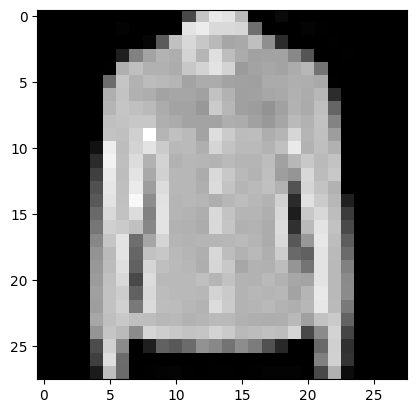

In [10]:
plt.imshow(x_train[0], cmap='gray') 
print(y_train[0])

print('range = ', np.min(y_train), ' to ', np.max(y_train))

In [11]:
# Data preprocessing : Convert intensiteis to 0 to 1 value.
# Converting to this smaller scale will help model learn values easier.

x_train = x_train / 255.0

x_test = x_test / 255.0

x_val = x_val / 255.0

In [12]:
# Buliding the model
help(tf.keras.Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

In [13]:
help(tf.keras.layers.Flatten)

Help on class Flatten in module keras.src.layers.reshaping.flatten:

class Flatten(keras.src.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  Note: If inputs are shaped `(batch,)` without a feature axis, then
 |  flattening adds an extra channel dimension and output shape is `(batch, 1)`.
 |  
 |  Args:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      When unspecified, uses
 |      `image_data_format` value found in your Keras config file at
 |       `~/.keras/keras.json` (if exists) else 'channels_last'.
 |      Defaults to 'channels_last'.
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.

In [14]:
# FLatten the image into a large 1d array as the first step.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
help(model.compile)

Help on method compile in module keras.src.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, jit_compile=None, pss_evaluation_shards=0, **kwargs) method of keras.src.engine.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
  

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [17]:
model.summary()

x_train[0].shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(28, 28)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
 476/1407 [=========>....................] - ETA: 5s - loss: 0.2350 - accuracy: 0.9109

In [ ]:
help(history)
print(history.params)

In [ ]:
print(history.history.keys())

In [ ]:
# Plot epochs vs loss
epochs = range(1, 21)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, history.history['loss'], 'bo', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='validation loss')
         

In [ ]:
# Plot epochs vs accuracy
epochs = range(1, 21)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, history.history['accuracy'], 'bo', label='train_acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='validation_acc')
         

In [ ]:
# To get test accuracy
history = model.evaluate(x_test, y_test)

preds = model.predict(x_test)

# The output of model is a vector of size 10, but we want a scalar value.
preds = [np.argmax(i) for i in preds]
# help(tf.math.confusion_matrix)

cm = tf.math.confusion_matrix(y_test, preds)

In [ ]:
import seaborn as sb
plt.figure(figsize=(25, 16))
plt.xlabel('pred')
plt.ylabel('actual')
sb.heatmap(cm, annot=True)
plt.show()

In [ ]:
# Adding regularization (L2 used here)
# Flatten the image into a large 1d array as the first step.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))



In [ ]:
# Plot epochs vs accuracy
epochs = range(1, 21)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, history.history['accuracy'], 'bo', label='train_acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='validation_acc')
         

In [ ]:
# To get test accuracy
history = model.evaluate(x_test, y_test)

preds = model.predict(x_test)

# The output of model is a vector of size 10, but we want a scalar value.
preds = [np.argmax(i) for i in preds]
# help(tf.math.confusion_matrix)

cm = tf.math.confusion_matrix(y_test, preds)

In [ ]:
import seaborn as sb
plt.figure(figsize=(25, 16))
plt.xlabel('pred')
plt.ylabel('actual')
sb.heatmap(cm, annot=True)
plt.show()